In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

train = pd.read_csv("train_new.csv")
test = pd.read_csv("test_new.csv")
idcol = test['id']
#train.shape

In [3]:
#train['comment_text']

In [4]:
#df = pd.concat([train['comment_text'], test['comment_text']], axis=0)

In [5]:
#type(df)

In [6]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_y = train[label_cols]

In [7]:
#df = df.fillna("unknown")
nrow_train = train.shape[0]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2)

In [8]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
#x = list(df)

In [9]:
corpus_text = []
for i in range(len(train['comment_text'])):
    c = train['comment_text'][i]
    c= c.lower()
    c = c.split()
   # ps = PorterStemmer()
    c = [stemmer.stem(word) for word in c]
    c = ' '.join(c)
    corpus_text.append(c)

x = corpus_text
#stemmer.stem(x)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

#vect = TfidfVectorizer(max_features=50000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
wordvect = TfidfVectorizer( lowercase=True, analyzer='word',stop_words= 'english', token_pattern=u'(?ui)\\b[a-z][a-z][a-z]+\\b',
                       max_features=10000, min_df=2 ,ngram_range=(1,2),dtype=np.float32)

#charvect = TfidfVectorizer( lowercase=True, analyzer='char', max_features=30000,ngram_range=(1,5),token_pattern=u'(?ui)\\b[a-z][a-z][a-z]+\\b')

In [11]:
wordfeatures = wordvect.fit(x)
#charfeatures = charvect.fit(x)

In [12]:
train_word_features = wordvect.transform(train['comment_text'])
test_word_features = wordvect.transform(test['comment_text'])

#turain_char_features = charvect.transform(train['comment_text'])
#test_char_features = charvect.transform(test['comment_text'])

In [13]:
train =  train_word_features
test = test_word_features

In [14]:
test.shape

(153164, 10000)

In [15]:
from sklearn.linear_model import LogisticRegression

Building 0 model for column:toxic
Building 1 model for column:severe_toxic
Building 2 model for column:obscene
Building 3 model for column:threat
Building 4 model for column:insult
Building 5 model for column:identity_hate


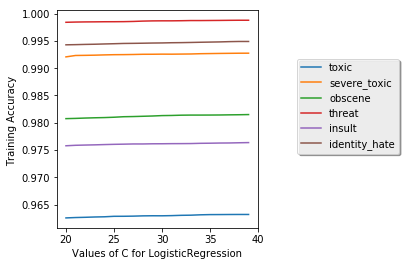

In [36]:
pred = np.zeros((test.shape[0], len(label_cols)))

fig = plt.figure()
ax = plt.subplot(111)
for i,col in enumerate(label_cols):
    print('Building {} model for column:{''}'.format(i,col)) 
    scores =[]
    c_range=range(20,40)
    for c in c_range:
        model = LogisticRegression(C=c,random_state = i)
        model.fit(train,train_y[col])
        #cv_score.append(lr.score)
        #pred[:,i] = model.predict_proba(test)[:,1]
        scores.append(model.score(train, train_y[col]))
        #print("Accuracy on training set: {:.3f}".format(model.score(train, train_y[col])))
   
    ax.plot(c_range,scores,label=col)
plt.xlabel('Values of C for LogisticRegression')
plt.ylabel('Training Accuracy ')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    
        